# LTR age assessment

In [1]:
%matplotlib inline

In [57]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

If ltr_finder was run in multiple runs, run the section above "Import all time_table.tsv results into one df" with as many infn and out_paths as needed. Then the notebook will combine them.  

It is also important to ensure that the "Fasta per bedfile" section includes the full genome sequence

Note: this notebook will wipe anything already in the out_path file with suffix .fa or .bed.

### ID per LTR retrotransposon

In [27]:
infn = '/home/jemimah/analysis/v3/ltr_finder/20200817_parallel_2/Walli.v3.contigs.purge_dups.fa.finder.combine.scn'
out_path = "/home/jemimah/scripts/notebooks/Submission_Notebooks"

In [4]:
scnheader = "ret_start ret_end ret_length lLTR_start lLTR_end lLTR_length rLTR_start rLTR_end rLTR_length similarity seq-order contig".split(" ")
scndf = pd.read_csv(infn, sep=' ', header=None, names = scnheader,  comment = '#')

In [5]:
#scndf

In [6]:
# give each LTR retrotransposon an id

list_ = []
for x in scndf["contig"].unique():
    num = len(scndf[scndf["contig"] == x])
    for y in range(1, num + 1):
        if y < 10:
            list_ += [(x + "_00" + str(y))]
        elif y < 100:
            list_ += [(x + "_0" + str(y))]
        else:
            list_ += [(x + "_" + str(y))]
scndf["id"] = list_

In [7]:
#scndf

In [8]:
#saving this new file
id_path = out_path + (infn.split("/")[-1]) + ".id"
scndf.to_csv(id_path, sep = "\t", header = False, index = False)

In [9]:
#testing that the ids were added for each contig
#for x in scndf["contig"].unique():
#    boo = (scndf["id"].str.contains(x) & scndf["contig"].str.contains(x)).sum()
#    le = len(scndf[scndf["id"].str.contains(x)])
#    if boo != le:
#        print(x)
#        print(boo)
#        print(le)
#print("done")

### Bed Files for 5' and 3' LTR

In [10]:
scndf_id = scndf.set_index("id", inplace = False, drop = False)
scndf_id

,ret_start,ret_end,ret_length,lLTR_start,lLTR_end,lLTR_length,rLTR_start,rLTR_end,rLTR_length,similarity,seq-order,contig,id
id,,,,,,,,,,,,,
tig00000001_001,112397,120106,7710,112397,113064,668,119439,120106,668,94.0,0,tig00000001,tig00000001_001
tig00000001_002,159934,167489,7556,159934,160600,667,166822,167489,668,96.4,0,tig00000001,tig00000001_002
tig00000001_003,185406,200553,15148,185406,188750,3345,197206,200553,3348,96.9,0,tig00000001,tig00000001_003
tig00000001_004,258167,266817,8651,258167,258804,638,266179,266817,639,94.5,0,tig00000001,tig00000001_004
tig00000001_005,306756,322808,16053,306756,307385,630,322181,322808,628,94.9,0,tig00000001,tig00000001_005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
hap_tig00120879_REPEAT_008,467842,477037,9196,467842,469882,2041,474998,477037,2040,98.3,8013,hap_tig00120879_REPEAT,hap_tig00120879_REPEAT_008
hap_tig00120880_REPEAT_001,77876,84222,6347,77876,78542,667,83556,84222,667,96.9,8014,hap_tig00120880_REPEAT,hap_tig00120880_REPEAT_001
hap_tig00120880_REPEAT_002,88526,96253,7728,88526,89228,703,95552,96253,702,96.7,8014,hap_tig00120880_REPEAT,hap_tig00120880_REPEAT_002


In [11]:
%%bash -s "$out_path"
cd $1
mkdir bedfiles/
ls bedfiles/ | wc -l

0


In [12]:
for x in scndf_id["id"]:
    ids_ = [x + "_l", x + "_r"]
    contig_ = [scndf_id.loc[x, "contig"], scndf_id.loc[x, "contig"]]
    start_ = [scndf_id.loc[x, "lLTR_start"], scndf_id.loc[x, "rLTR_start"]]
    end_ = [scndf_id.loc[x, "lLTR_end"], scndf_id.loc[x, "rLTR_end"]]
    dict_ = {"chromosome_name": contig_, "start": start_, "end": end_, "bed_name": ids_}
    df = pd.DataFrame(dict_)
    path_ = out_path + "bedfiles/" + x +".bed"
    df.to_csv(path_, sep = "\t", header = False, index = False)

In [13]:
%%bash -s "$out_path"
cd $1
ls bedfiles/ | wc -l
ls bedfiles/ | head

66989
hap_tig00000061_REPEAT_001.bed
hap_tig00000272_JUNK_001.bed
hap_tig00000389_REPEAT_001.bed
hap_tig00000442_REPEAT_001.bed
hap_tig00000445_HAPLOTIG_001.bed
hap_tig00000449_REPEAT_001.bed
hap_tig00000496_REPEAT_001.bed
hap_tig00000589_JUNK_001.bed
hap_tig00000630_REPEAT_001.bed
hap_tig00000630_REPEAT_002.bed


### Fasta per bedfile

In [ ]:
#here the -fi input has to be the full assembly

In [14]:
%%bash -s "$out_path"
cd $1/bedfiles
mkdir ../fasta/
for x in *.bed; do bedtools getfasta -fi ~/analysis/v3/ltr_finder/20200817_parallel_2/Walli.v3.contigs.purge_dups.fa -bed ${x} -fo ../fasta/${x%%.bed}.fa; done
ls ../fasta/ | wc -l
ls ../fasta/ | head
mkdir ../alignments/

66989
hap_tig00000061_REPEAT_001.fa
hap_tig00000272_JUNK_001.fa
hap_tig00000389_REPEAT_001.fa
hap_tig00000442_REPEAT_001.fa
hap_tig00000445_HAPLOTIG_001.fa
hap_tig00000449_REPEAT_001.fa
hap_tig00000496_REPEAT_001.fa
hap_tig00000589_JUNK_001.fa
hap_tig00000630_REPEAT_001.fa
hap_tig00000630_REPEAT_002.fa


### LTR Alignement

Clustal didn't work from jupyter, possibly because of conda install decisions I made, and so the notebook prints the below lines which need to be copied into bash terminal. Clustal was also the longest step, so this allowed me to leave it running in tmux in the background.

In [22]:
#print("conda activate clust")
print("cd " + out_path + "fasta/")
print("for x in *.fa; do clustalo -i ${x} -outfmt=clustal -o ../alignments/${x%%.fa}.aln -v ; done")

conda activate clust
cd /home/jemimah/scripts/notebooks/Submission_Notebooks/fasta/
for x in *.fa; do clustalo -i ${x} -outfmt=clustal -o ../alignments/${x%%.fa}.aln -v ; done


In [21]:
hi this is just to crash the notebook

SyntaxError: invalid syntax (<ipython-input-21-afc9c30ef56b>, line 1)

In [31]:
%%bash -s "$out_path"
cd $1
ls alignments/ | wc -l
ls alignments/ | head

66989
hap_tig00000061_REPEAT_001.aln
hap_tig00000272_JUNK_001.aln
hap_tig00000389_REPEAT_001.aln
hap_tig00000442_REPEAT_001.aln
hap_tig00000445_HAPLOTIG_001.aln
hap_tig00000449_REPEAT_001.aln
hap_tig00000496_REPEAT_001.aln
hap_tig00000589_JUNK_001.aln
hap_tig00000630_REPEAT_001.aln
hap_tig00000630_REPEAT_002.aln


### LTR distance

In [33]:
%%bash -s "$out_path"
cd $1/alignments
mkdir ../dist/
for i in *.aln; do distmat -sequence ${i} -nucmethod 2 -outfile ../dist/${i%%.aln}.k80.distmat ; done
ls ../dist/ | wc -l
ls ../dist/ | head

66989
hap_tig00000061_REPEAT_001.k80.distmat
hap_tig00000272_JUNK_001.k80.distmat
hap_tig00000389_REPEAT_001.k80.distmat
hap_tig00000442_REPEAT_001.k80.distmat
hap_tig00000445_HAPLOTIG_001.k80.distmat
hap_tig00000449_REPEAT_001.k80.distmat
hap_tig00000496_REPEAT_001.k80.distmat
hap_tig00000589_JUNK_001.k80.distmat
hap_tig00000630_REPEAT_001.k80.distmat
hap_tig00000630_REPEAT_002.k80.distmat


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Getting distances into one table

The number of distances and the number of ids needs to be the same or there will be errors in the dist_list code

In [35]:
%%bash -s "$out_path"
cd $1/dist
ls | wc -l

66989


In [36]:
len(list(scndf_id.id))

66989

In [37]:
dist_list = []
for x in (list(scndf_id.id)):
    distfile = out_path + "/dist/" + x + ".k80.distmat"
    dist_df = pd.read_csv(distfile, sep='\t', header=None, skipinitialspace = True, skiprows = 8)
    dist_list += [dist_df.iloc[0, 2]]
        
#dist_list

In [38]:
dist_table = scndf_id[["id"]]
dist_table["distance"] = dist_list

<ipython-input-38-14cd68cbfd4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist_table["distance"] = dist_list


In [39]:
dist_table.head()

,id,distance
id,,
tig00000001_001,tig00000001_001,6.32
tig00000001_002,tig00000001_002,4.50
tig00000001_003,tig00000001_003,3.13
tig00000001_004,tig00000001_004,5.89
tig00000001_005,tig00000001_005,4.99


In [40]:
filepath = out_path +"dist_table.tsv"
dist_table.to_csv(filepath, sep = "\t", header = False, index = False)

 ### Converting Distance Table to Time Table

In [41]:
time_table = dist_table.copy()

In [42]:
#sunflower rate
time_table["time"] = time_table["distance"] / (100* 2* 10**(-8))

In [43]:
#alternative rate (yan)
#time_table["time"] = time_table["distance"] / (100* 2* 1.3 * 10**(-8))

In [44]:
time_table.head()

,id,distance,time
id,,,
tig00000001_001,tig00000001_001,6.32,3160000.0
tig00000001_002,tig00000001_002,4.50,2250000.0
tig00000001_003,tig00000001_003,3.13,1565000.0
tig00000001_004,tig00000001_004,5.89,2945000.0
tig00000001_005,tig00000001_005,4.99,2495000.0


In [45]:
filepath = out_path +"time_table.tsv"
time_table.to_csv(filepath, sep = "\t", header = False, index = False)

## Import all time_table.tsv results into one df

In [46]:
#list of all outpaths
time_tables = !ls ~/analysis/v3/ltr_age/*/time_table.tsv
#time_tables = [out_path + "time_table.tsv"]

In [47]:
cols = ["id", "distance", "time"]
all_time_tables = pd.DataFrame()
for x in time_tables:
    time_table_import = pd.read_csv(x, sep = "\t", header=None, names = cols)
    all_time_tables = all_time_tables.append(time_table_import)

In [48]:
#!wc -l ~/analysis/v3/ltr_age/*/time_table.tsv

In [49]:
len(all_time_tables)

78904

In [50]:
all_time_tables.head()

,id,distance,time
0,tig00000001_001,6.32,3160000.0
1,tig00000001_002,4.50,2250000.0
2,tig00000001_003,3.13,1565000.0
3,tig00000001_004,5.89,2945000.0
4,tig00000001_005,4.99,2495000.0


In [51]:
#select an outpath
all_outpath = "~/analysis/v3/ltr_age/all_time_table.tsv"
all_time_tables.to_csv(all_outpath, sep = "\t", header = False, index = False)

## Graphing the Results

In [52]:
time_header = "id	distance	time".split('\t')
all_time_tables = pd.read_csv("~/analysis/v3/ltr_age/all_time_table.tsv", sep = "\t", header = None, names = time_header)

In [53]:
all_time_tables["time"].mean()

3073159.5990063874

In [54]:
all_time_tables["time"].max()

27070000.0

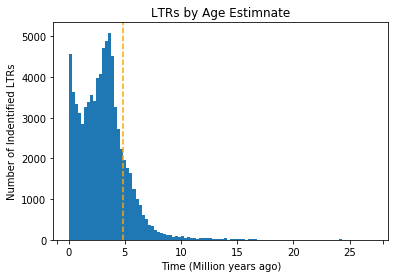

In [55]:
fig = plt.figure()
plt.hist(all_time_tables["time"], bins= 100)
plt.xticks([-1000000.,        0.,  5000000., 10000000., 15000000., 20000000.,
        25000000., 28000000.], [None, "0", "5", "10", "15", "20",
        "25", None])
plt.xlabel("Time (Million years ago)")
plt.ylabel("Number of Indentified LTRs")
plt.title("LTRs by Age Estimnate")
plt.axvline(x=4800000, color='orange', linestyle='dashed')

fig.savefig('temp_rescale.png', transparent=True)

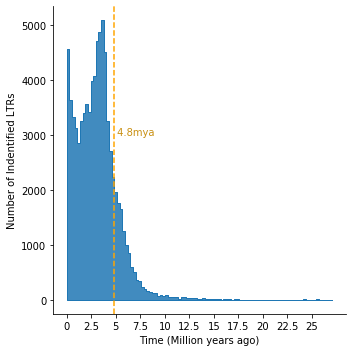

In [58]:
g = sns.displot(data = all_time_tables, x="time", bins=100, 
            element="step", color = sns.color_palette("tab10").as_hex()[0],
               alpha = 0.85)
plt.xlabel("Time (Million years ago)")
plt.ylabel("Number of Indentified LTRs")
plt.xticks(list(range(0,26000000, 2500000)), 
           [int(num) if float(num).is_integer() else num for num in np.arange(0,26, 2.5)])
g.ax.text(4800000 , 3000, " 4.8mya", color='#C99013')
plt.axvline(x=4800000, color='orange', linestyle='dashed')
g.savefig('Thesis_images/LTRS_with48.svg', transparent=True)

In [59]:
len(all_time_tables[all_time_tables["time"] < (0.48 * (10**7))])

65910

In [60]:
len(all_time_tables[all_time_tables["time"] >= (0.48 * (10**7))])

12994

In [61]:
len(all_time_tables)

78904

In [62]:
(65910/78904)*100

83.53188684984285

This puts 83% as since the 4.8mya mark or Wallis entering Australia.

It would be useful to know the scale of detail that the results have.

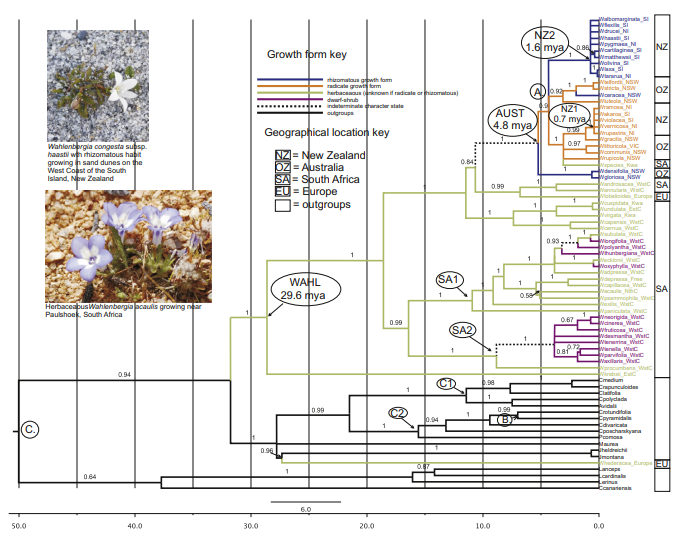

Image, and information on _Wahlenbergia_ clade divergence:

Prebble, J.M., Cupido, C.N., Meudt, H.M. & Garnock-Jones, P.J. 2011. _First phylogenetic and biogeographical study of the southern bluebells (Wahlenbergia, Campanulaceae)_. Molecular Phylogenetics and Evolution, 59: 636-648.